<a href="https://colab.research.google.com/github/renatopaschoalim/rh_ml_heroku/blob/main/Machine_Learning_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desgaste e desempenho de funcionário do IBM HR Analytics
###Previsão do desgaste de seus valiosos funcionários

Descubra os fatores que levam ao desgaste de funcionários e como consequentemente a sair da empresa que trabalha. Este é um conjunto de dados fictício criado por cientistas de dados da IBM com 1470 registros.


Informações:
* Idade
* Desgaste
* Viagem a negócio
* Salário diário
* Departamento
* Distância de casa do trabalho
* Educação
  * 1 Ensino Médio
  * 2 Graduado
  * 3 Pós Graduado
  * 4 Mestre
  * 5 Doutor
* Área de formação
* Contagem Funcionário
* Matricula do funcionário
* Satisfeito com ambiente
  * 1 Baixo
  * 2 Médio
  * 3 Alto
  * 4 Muito Alto
* Genero
* Horas trabalhadas
* Envolvimento com trabalho
  * 1 Baixo
  * 2 Médio
  * 3 Alto
  * 4 Muito Alto
* Nível do emprego
* Cargo
* Satisfeito com o trabalho
  * 1 Baixo
  * 2 Médio
  * 3 Alto
  * 4 Muito Alto
* Estado Civil
* Renda mensal
* Taxa de salario mensal
* Nº de empresas que trabalhou
* Mais de 18 anos
* Horas Extra
* Aumento de salário percentual
* Avaliação de desempenho
  * 1 Baixo
  * 2 Bom
  * 3 Excelente
  * 4 Excepcional
* Satisfeito com relacionamento no trabalho
  * 1 Baixo
  * 2 Médio
  * 3 Alto
  * 4 Muito Alto
* Carga horária
* Nível de ações na empresa
* Tempo de registro em carteira
* Tempo de treinamento no ano passado
* Equilibrio entre o trabalho e vida pessoal
  * 1 Ruim
  * 2 Bom
  * 3 Melhor
  * 4 Melhor
* Tempo na empresa atual
* Ano desde da ultima promoção
* Anos com o mesmo gerente


https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#1. Importação da biblioteca que serão usadas na exploração dos dados

In [200]:
#Carregando as bibliotecas para exploração dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#2. Carregando a base de dados no Google Drive

In [201]:
#Comando para carregar base de dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
#Carregando a base de dados em uma variável
df_empregados = pd.read_csv('/content/drive/MyDrive/Portfólio Machine Learning/Departamento Recursos Humanos/Human_Resources.csv')

#3. Exploração dos dados

In [203]:
#Visualizando o shape da base de dados
df_empregados.shape

(1470, 35)

In [204]:
#Visualizando os primeiros 5 registros do dataset
df_empregados.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [205]:
#Renomeando as colunas
df_empregados = df_empregados.rename(columns={'Age':'Idade', 'Attrition':'Atrito', 'BusinessTravel':'Viagem_Negocio', 'DailyRate':'Valor_Diario', 'Department':'Departamento', 'DistanceFromHome':'Distancia_Casa',
                                              'Education':'Educacao', 'EducationField':'Area_Formacao', 'EmployeeCount':'Cont_Empregado',  'EmployeeNumber':'Matricula_Empreg', 'EnvironmentSatisfaction':'Satisfeito_Ambiente',
                                              'Gender':'Genero', 'HourlyRate':'Horas_Trabalhadas', 'JobInvolvement':'Envolvimento_Trabalho', 'JobLevel':'Nivel_Emprego', 'JobRole':'Cargo', 'JobSatisfaction':'Satisfeito_Trabalho',
                                              'MaritalStatus':'Estado_Civil', 'MonthlyIncome':'Renda_Mensal', 'MonthlyRate':'Taxa_Mensal', 'NumCompaniesWorked':'Num_Empresa_Trabalhou', 'Over18':'Mais_18', 'OverTime':'Hora_Extra',
                                              'PercentSalaryHike':'Aumento_Percentual_Salar', 'PerformanceRating':'Avaliacao_Desempenho', 'RelationshipSatisfaction':'Satisfacao_Relacionamento', 'StandardHours':'Carga_Horaria',
                                              'StockOptionLevel':'Nivel_Acoes_Empresa', 'TotalWorkingYears':'Tempo_De_Registro', 'TrainingTimesLastYear':'Tempo_Treinamento_Ano_Passado', 'WorkLifeBalance':'Equilibrio_Trab_Vida_Pess',
                                              'YearsAtCompany':'Tempo_Na_Empresa', 'YearsInCurrentRole':'Anos_Funcao_Atual', 'YearsSinceLastPromotion':'Anos_Desde_Ultim_Promo', 'YearsWithCurrManager':'Anos_Com_Mesmo_Gerente'})

In [206]:
  #Descrição dos dados numerérico
  df_empregados.describe()

,Idade,Valor_Diario,Distancia_Casa,Educacao,Cont_Empregado,Matricula_Empreg,Satisfeito_Ambiente,Horas_Trabalhadas,Envolvimento_Trabalho,Nivel_Emprego,Satisfeito_Trabalho,Renda_Mensal,Taxa_Mensal,Num_Empresa_Trabalhou,Aumento_Percentual_Salar,Avaliacao_Desempenho,Satisfacao_Relacionamento,Carga_Horaria,Nivel_Acoes_Empresa,Tempo_De_Registro,Tempo_Treinamento_Ano_Passado,Equilibrio_Trab_Vida_Pess,Tempo_Na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultim_Promo,Anos_Com_Mesmo_Gerente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [207]:
#Visualizando dados único da variável "Area de Formação"
df_empregados['Area_Formacao'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [208]:
#Visualizando informação da base de dados
df_empregados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Idade                          1470 non-null   int64 
 1   Atrito                         1470 non-null   object
 2   Viagem_Negocio                 1470 non-null   object
 3   Valor_Diario                   1470 non-null   int64 
 4   Departamento                   1470 non-null   object
 5   Distancia_Casa                 1470 non-null   int64 
 6   Educacao                       1470 non-null   int64 
 7   Area_Formacao                  1470 non-null   object
 8   Cont_Empregado                 1470 non-null   int64 
 9   Matricula_Empreg               1470 non-null   int64 
 10  Satisfeito_Ambiente            1470 non-null   int64 
 11  Genero                         1470 non-null   object
 12  Horas_Trabalhadas              1470 non-null   int64 
 13  Env

In [209]:
#Visualizando dados único da variável "Departamento"
df_empregados['Departamento'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [210]:
#Visualizando dados único da variável "Viagem_Negocio"
df_empregados['Viagem_Negocio'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [211]:
#Visualizando dados da variável "Cargo"
df_empregados['Cargo'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [212]:
#Visualizando dados único da variável "Estado_Civil"
df_empregados['Estado_Civil'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [213]:
#Visualizando dados único da variável "Area_Formacao"
df_empregados['Area_Formacao'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

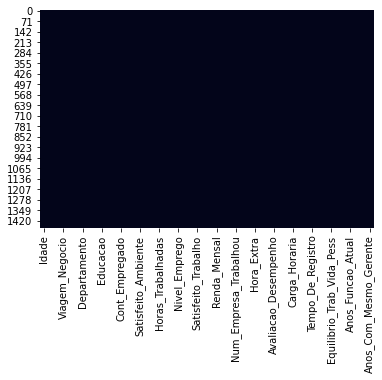

In [214]:
#Gráfico para visualização de dados faltantes
sns.heatmap(df_empregados.isnull(), cbar=False);

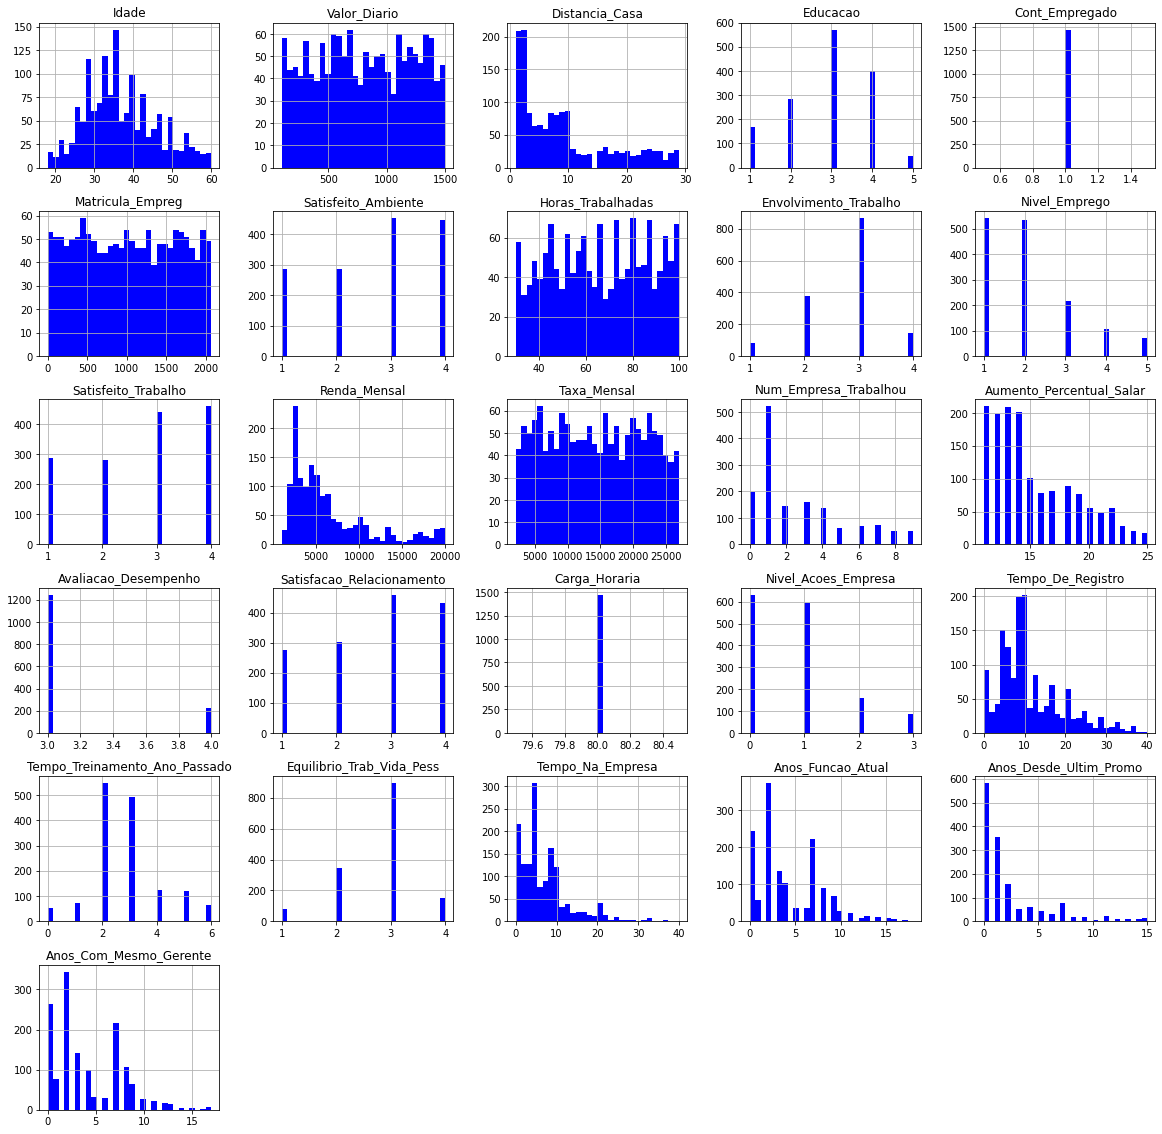

In [215]:
#Gráfico para exploração dos dados
df_empregados.hist(bins=30, figsize=(20,20), color = 'b');

In [216]:
#Apagando as colunas que não serão relevante para o modelo
df_empregados.drop(['Cont_Empregado', 'Matricula_Empreg', 'Mais_18', 'Carga_Horaria'], axis=1, inplace=True)

In [217]:
#Visualizando o shape da base
df_empregados.shape

(1470, 31)

In [218]:
#Visualizando os primeiros 5 registros da base
df_empregados.head()

,Idade,Atrito,Viagem_Negocio,Valor_Diario,Departamento,Distancia_Casa,Educacao,Area_Formacao,Satisfeito_Ambiente,Genero,Horas_Trabalhadas,Envolvimento_Trabalho,Nivel_Emprego,Cargo,Satisfeito_Trabalho,Estado_Civil,Renda_Mensal,Taxa_Mensal,Num_Empresa_Trabalhou,Hora_Extra,Aumento_Percentual_Salar,Avaliacao_Desempenho,Satisfacao_Relacionamento,Nivel_Acoes_Empresa,Tempo_De_Registro,Tempo_Treinamento_Ano_Passado,Equilibrio_Trab_Vida_Pess,Tempo_Na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultim_Promo,Anos_Com_Mesmo_Gerente
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [219]:
#Visualizando informações sobre a base de dados
df_empregados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Idade                          1470 non-null   int64 
 1   Atrito                         1470 non-null   object
 2   Viagem_Negocio                 1470 non-null   object
 3   Valor_Diario                   1470 non-null   int64 
 4   Departamento                   1470 non-null   object
 5   Distancia_Casa                 1470 non-null   int64 
 6   Educacao                       1470 non-null   int64 
 7   Area_Formacao                  1470 non-null   object
 8   Satisfeito_Ambiente            1470 non-null   int64 
 9   Genero                         1470 non-null   object
 10  Horas_Trabalhadas              1470 non-null   int64 
 11  Envolvimento_Trabalho          1470 non-null   int64 
 12  Nivel_Emprego                  1470 non-null   int64 
 13  Car

In [220]:
#Transformando a variável 'Atrito' e 'Hora Extra' em númerico
df_empregados['Atrito'] = df_empregados['Atrito'].apply(lambda x: 1 if x == 'Yes' else 0)
df_empregados['Hora_Extra'] = df_empregados['Hora_Extra'].apply(lambda x: 1 if x == 'Yes' else 0)
df_empregados.Atrito.value_counts()

0    1233
1     237
Name: Atrito, dtype: int64

In [221]:
#Visualização da quantidade de funcionário sairam ou não da empresa
left_company = df_empregados[df_empregados['Atrito'] == 1]
stayed_company = df_empregados[df_empregados['Atrito'] == 0]
print('Total = ', len(df_empregados))
print('Número de funcionários que saíram da empresa = ', len(left_company))
print('Porcentagem de funcionários que saíram da empresa = {}%'.format(round((len(left_company) / len(df_empregados)) * 100)))
print('Número de funcionários que ficaram na empresa = {}'.format(len(stayed_company)))
print('Porcentagem de funcionários que ficaram na empresa = {}%'.format(round((len(stayed_company) / len(df_empregados)) * 100)))

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa = 16%
Número de funcionários que ficaram na empresa = 1233
Porcentagem de funcionários que ficaram na empresa = 84%


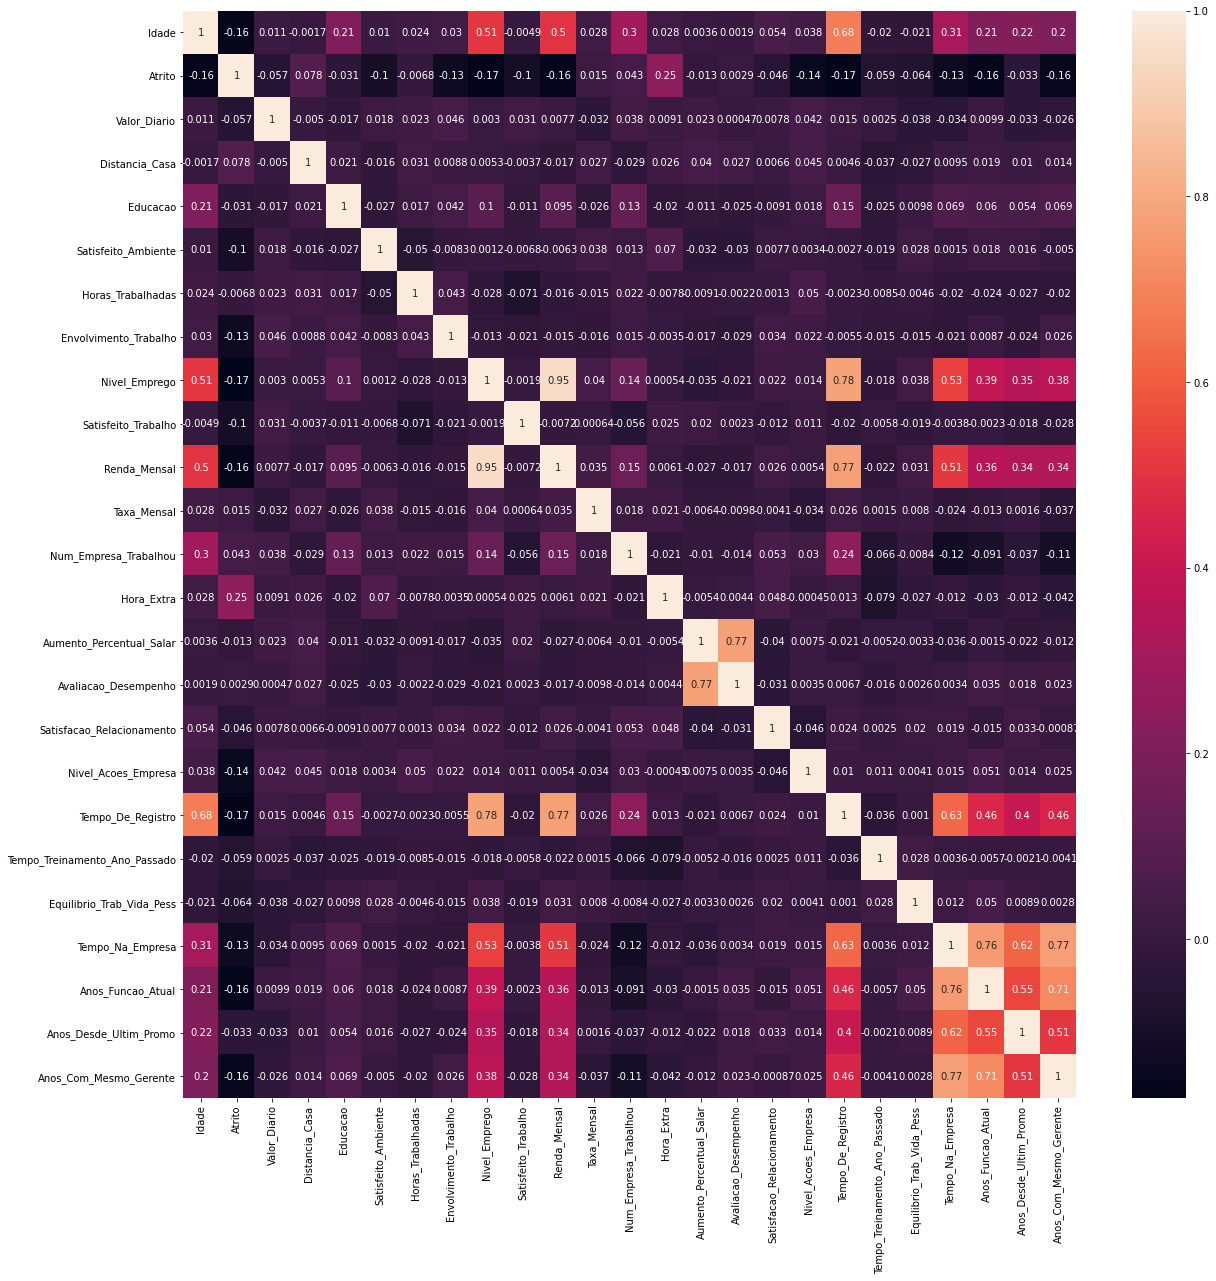

In [222]:
#Gráfico para mostrar a correção dos dados entre si
correlations = df_empregados.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [223]:
#Visualização das correções com a variável 'Atrito'
correlations = df_empregados.corr()['Atrito'].sort_values()
correlations

Tempo_De_Registro               -0.171063
Nivel_Emprego                   -0.169105
Anos_Funcao_Atual               -0.160545
Renda_Mensal                    -0.159840
Idade                           -0.159205
Anos_Com_Mesmo_Gerente          -0.156199
Nivel_Acoes_Empresa             -0.137145
Tempo_Na_Empresa                -0.134392
Envolvimento_Trabalho           -0.130016
Satisfeito_Trabalho             -0.103481
Satisfeito_Ambiente             -0.103369
Equilibrio_Trab_Vida_Pess       -0.063939
Tempo_Treinamento_Ano_Passado   -0.059478
Valor_Diario                    -0.056652
Satisfacao_Relacionamento       -0.045872
Anos_Desde_Ultim_Promo          -0.033019
Educacao                        -0.031373
Aumento_Percentual_Salar        -0.013478
Horas_Trabalhadas               -0.006846
Avaliacao_Desempenho             0.002889
Taxa_Mensal                      0.015170
Num_Empresa_Trabalhou            0.043494
Distancia_Casa                   0.077924
Hora_Extra                       0

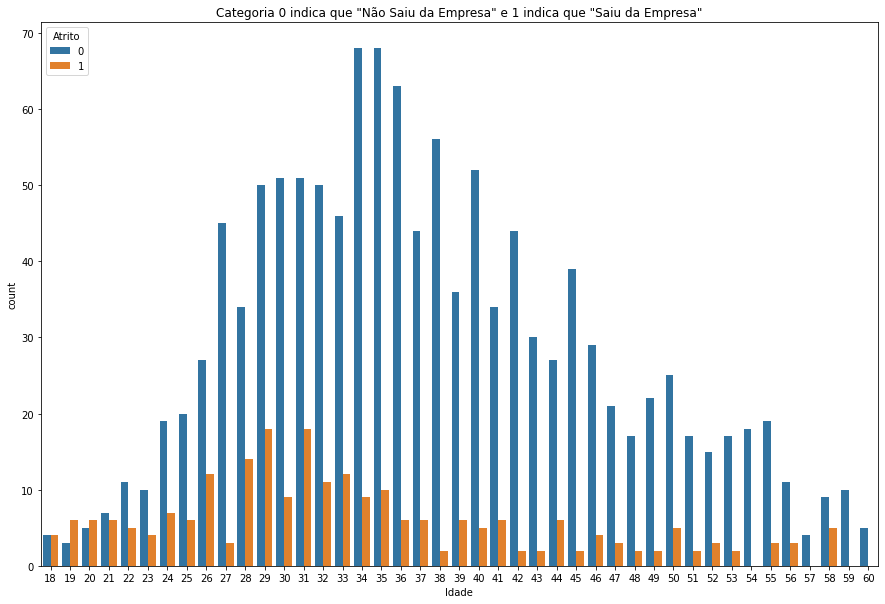

In [224]:
#Gráfico para mostrar os colaboradores que sairam ou não da empresa por idade
plt.figure(figsize=(15,10))
sns.countplot(x='Idade', hue= 'Atrito', data=df_empregados).set_title('Categoria 0 indica que "Não Saiu da Empresa" e 1 indica que "Saiu da Empresa"');

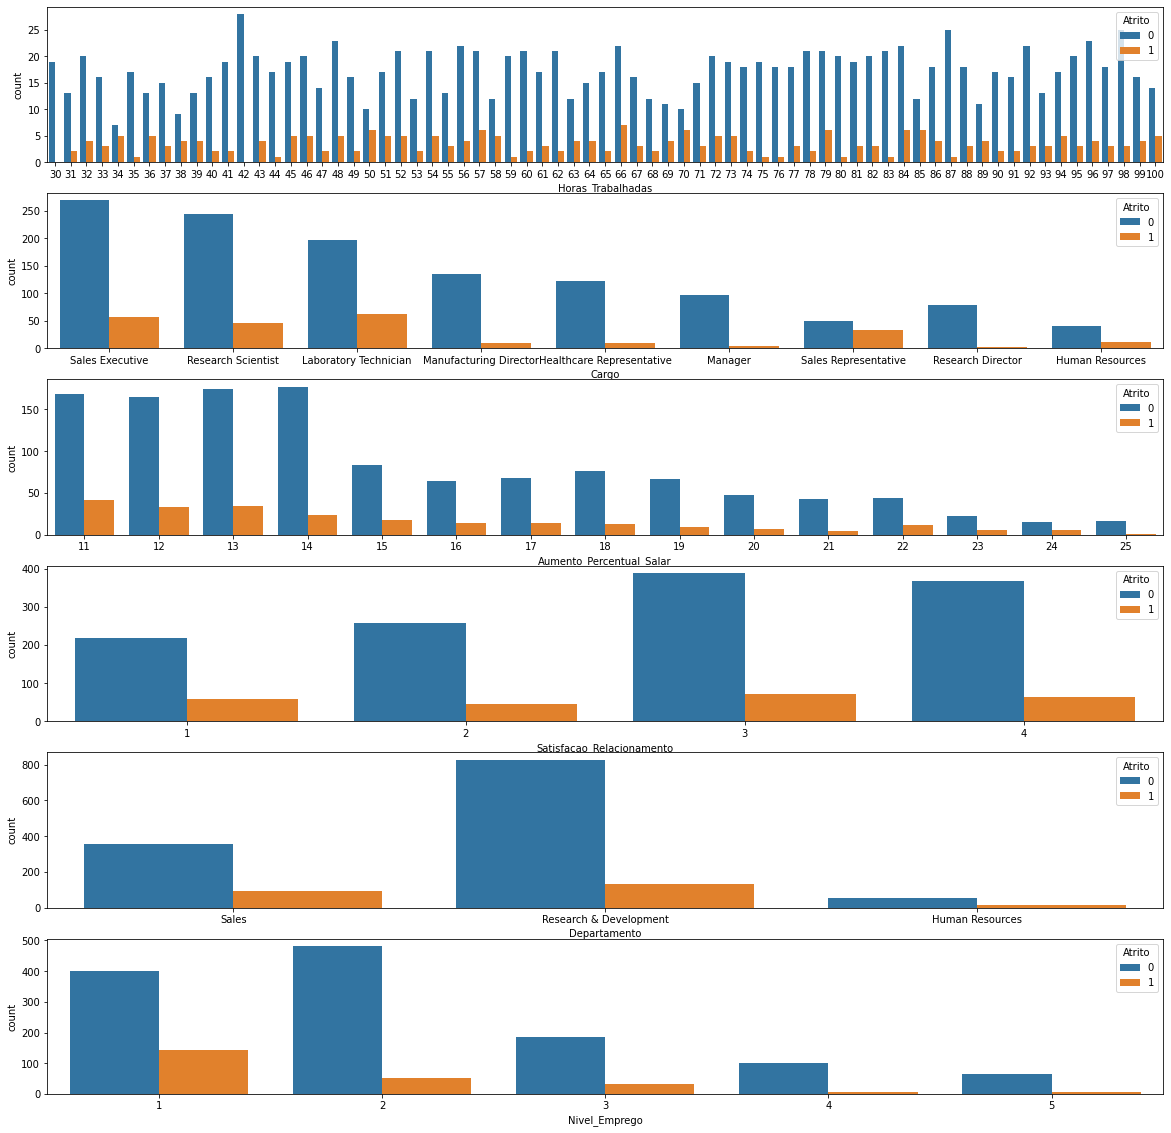

In [225]:
#Gráficos para mostrar funcionários que saíram ou não da empresa por 'Horas Trabalhadas', 'Cargo', 'Aumento percentual de salário', 'Satisfação Relacionamento', 'Departamento' e 'Nível de emprego'
plt.figure(figsize=[20,20])
plt.subplot(611)
sns.countplot(x = 'Horas_Trabalhadas', hue='Atrito', data=df_empregados);
plt.subplot(612)
sns.countplot(x = 'Cargo', hue='Atrito', data=df_empregados);
plt.subplot(613)
sns.countplot(x = 'Aumento_Percentual_Salar', hue='Atrito', data=df_empregados);
plt.subplot(614)
sns.countplot(x = 'Satisfacao_Relacionamento', hue='Atrito', data=df_empregados);
plt.subplot(615)
sns.countplot(x = 'Departamento', hue='Atrito', data=df_empregados);
plt.subplot(616)
sns.countplot(x = 'Nivel_Emprego', hue='Atrito', data=df_empregados);

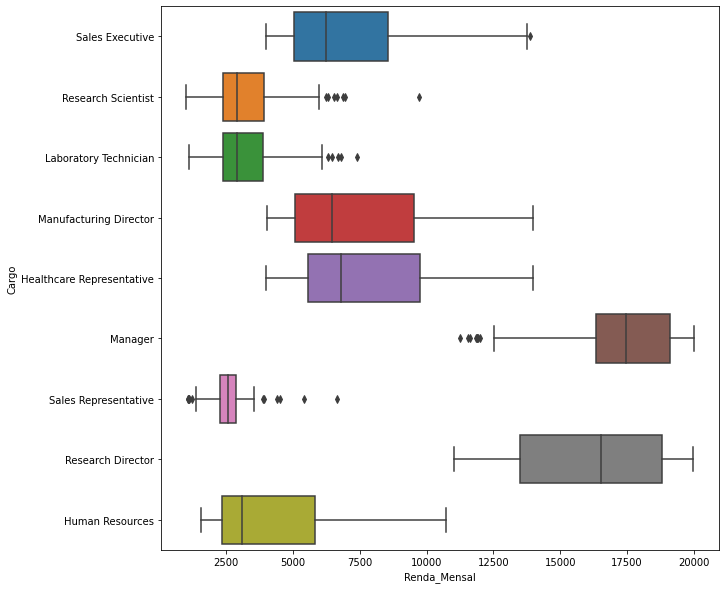

In [226]:
#Gráfico para mostrar renda mensal por cargo
plt.figure(figsize=(10,10))
sns.boxplot(x='Renda_Mensal', y='Cargo', data=df_empregados);

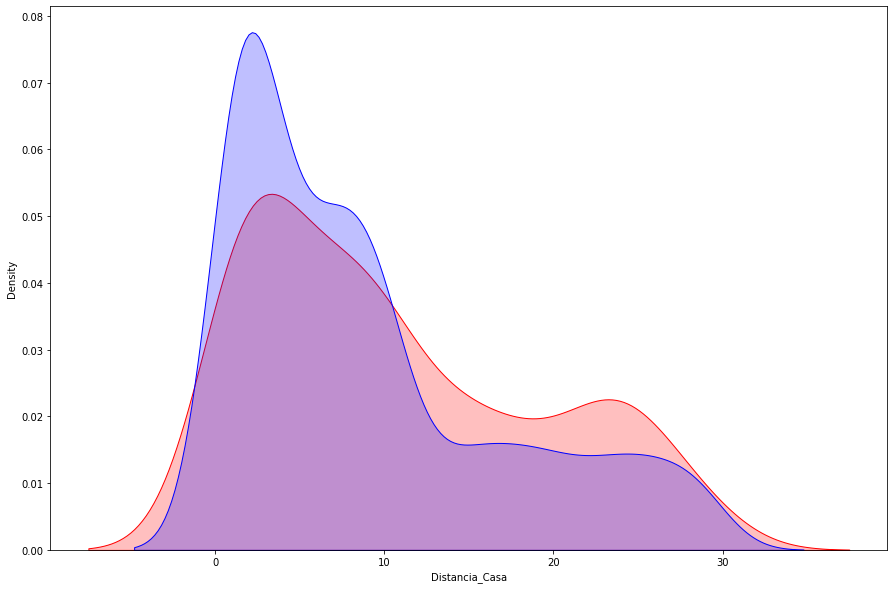

In [227]:
#Gráfico para apresentar a distribuição entre a variável 'Distancia de Casa' entre a variável 'Atrito'
plt.figure(figsize=(15,10))
sns.kdeplot(left_company['Distancia_Casa'], label='Colaboradores que saíram', shade=True, color='r', legend=False);
sns.kdeplot(stayed_company['Distancia_Casa'], label='Colaboradores que ficaram', shade=True, color='b', legend=False);

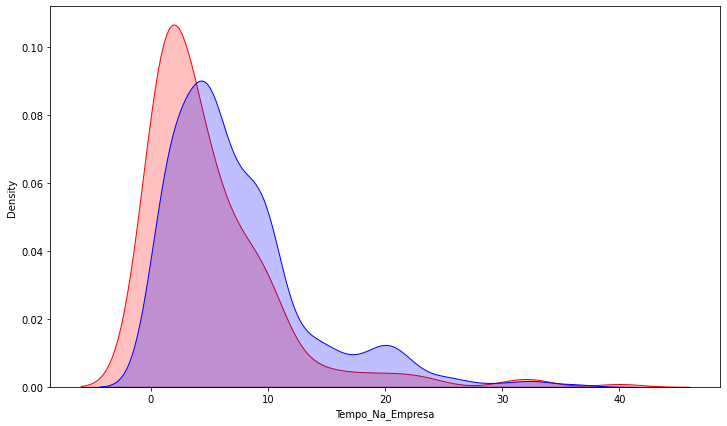

In [228]:
#Gráfico para apresentar a distribuição entre a variável 'Tempo na empresa' entre a variável 'Atrito'
plt.figure(figsize=(12,7))
sns.kdeplot(left_company['Tempo_Na_Empresa'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_company['Tempo_Na_Empresa'], label = 'Funcionários que ficaram', shade = True, color = 'b');

In [229]:
#Importação da biblioteca para transformação das variáveis categorica para numérico
from sklearn.preprocessing import OneHotEncoder

In [230]:
#Separando os dados em categórico e número e em seguida removendo a coluna 'Atrito'
df_cat = df_empregados.select_dtypes(include='object')
df_num = df_empregados.select_dtypes(exclude='object')
df_num.drop(['Atrito'], axis=1, inplace=True)

In [231]:
#Visualizando os 5 primeiros dados categórico
df_cat.head()

,Viagem_Negocio,Departamento,Area_Formacao,Genero,Cargo,Estado_Civil
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [232]:
#Visualizando o shape dos dados categórico e numérico
df_cat.shape, df_num.shape

((1470, 6), (1470, 24))

In [233]:
#Aplicando a transformação nos dados categórico
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()
df_cat = pd.DataFrame(df_cat)
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [234]:
#Visualizando o shape dos dados transformados
df_cat.shape

(1470, 26)

In [235]:
#Juntando os dados categórico transformado com os dados numérico
df_empregados_encoder = pd.concat([df_cat, df_num], axis=1)

In [236]:
#Visualizando o shape dos dados unificado
df_empregados_encoder.shape

(1470, 50)

In [237]:
#Visualizando os dados concatenados
df_empregados_encoder.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Idade,Valor_Diario,Distancia_Casa,Educacao,Satisfeito_Ambiente,Horas_Trabalhadas,Envolvimento_Trabalho,Nivel_Emprego,Satisfeito_Trabalho,Renda_Mensal,Taxa_Mensal,Num_Empresa_Trabalhou,Hora_Extra,Aumento_Percentual_Salar,Avaliacao_Desempenho,Satisfacao_Relacionamento,Nivel_Acoes_Empresa,Tempo_De_Registro,Tempo_Treinamento_Ano_Passado,Equilibrio_Trab_Vida_Pess,Tempo_Na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultim_Promo,Anos_Com_Mesmo_Gerente
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [238]:
#Separando os dados que serão usado para previsão da variável que será prevista
X = df_empregados_encoder
y = df_empregados['Atrito']

In [239]:
#Visualizando o shape dos dados separados
X.shape, y.shape

((1470, 50), (1470,))

In [240]:
#Importação da bibliote para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

In [241]:
#Aplicando a normalização nos dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.shape

(1470, 50)

In [242]:
#Visualizando a primeira linha dos dados normalizados
print(X[0])

[0.         0.         1.         0.         0.         1.
 0.         1.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         1.         0.54761905 0.71581961 0.         0.25
 0.33333333 0.91428571 0.66666667 0.25       1.         0.26245392
 0.6980526  0.88888889 1.         0.         0.         0.
 0.         0.2        0.         0.         0.15       0.22222222
 0.         0.29411765]


In [243]:
#Importando a biblioteca para separação dos dados de treino e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [244]:
#Visualizando a quantidade de registros por 'Atrito' - 1 indica que funcionário tem a tendência de sair da empresa
y_train.value_counts()

0    933
1    169
Name: Atrito, dtype: int64

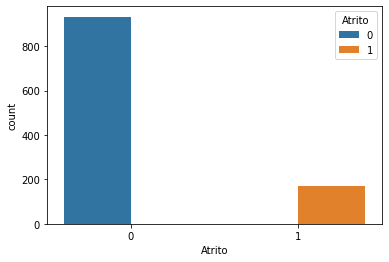

In [245]:
#Melhor visualização dos dados da classe 0 e 1
#Notamos que os dados estão desbalanceados
sns.countplot(y_train, hue=df_empregados['Atrito']);

In [246]:
#Importação das bibliotecas dos modelos e bibliotecas para validação dos modelos 
from xgboost import XGBClassifier
import xgboost
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score, confusion_matrix

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       300
           1       0.70      0.28      0.40        68

    accuracy                           0.85       368
   macro avg       0.78      0.63      0.66       368
weighted avg       0.83      0.85      0.82       368

XGB Matrix: [[292   8]
 [ 49  19]]



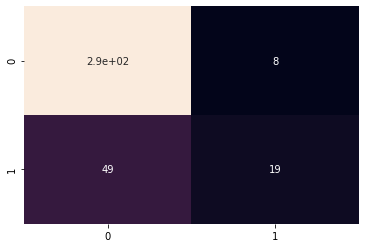

In [247]:
#Aplicando o modelo XGBClassifier com os dados desbalanceados
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, pred_xgb)
print(classification_report(y_test, pred_xgb))
print('XGB Matrix: {}\n'.format(cm_xgb))

sns.heatmap(cm_xgb, annot=True, cbar=False);

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       300
           1       0.80      0.12      0.21        68

    accuracy                           0.83       368
   macro avg       0.82      0.56      0.56       368
weighted avg       0.83      0.83      0.78       368

RF Matrix: [[298   2]
 [ 60   8]]



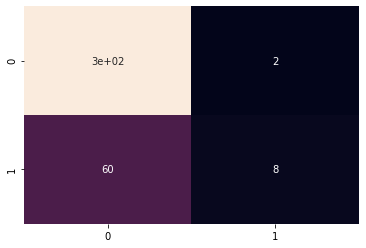

In [248]:
#Aplicando o modelo RandomForestClassifier com os dados desbalanceados
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, pred_rf)

print(classification_report(y_test, pred_rf))
print('RF Matrix: {}\n'.format(cm_rf))

sns.heatmap(cm_rf, annot=True, cbar=False);

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       300
           1       0.64      0.26      0.37        68

    accuracy                           0.84       368
   macro avg       0.75      0.62      0.64       368
weighted avg       0.81      0.84      0.81       368

RF Matrix: [[290  10]
 [ 50  18]]



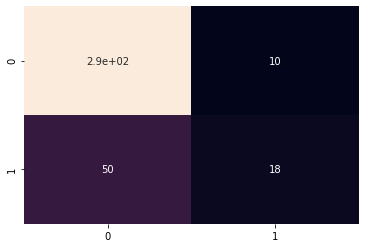

In [249]:
#Aplicando o modelo LGBMClassifier com os dados desbalanceados
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)

cm_rf = confusion_matrix(y_test, pred_lgbm)
print(classification_report(y_test, pred_lgbm))
print('RF Matrix: {}\n'.format(cm_rf))

sns.heatmap(cm_rf, annot=True, cbar=False);

O modelo que saiu melhor com os dados desbalanceado foi o XGBClassifier de acordo com a metrica F1-Score, acertando 40% da classe 1 que é o nosso objetivo.

In [250]:
#Importando as bibliotecas para balanceamento dos dados
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       297
           1       0.97      0.83      0.89       320

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.91      0.90      0.90       617

XGB Matrix: [[288   9]
 [ 54 266]]



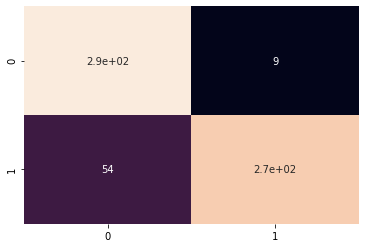

In [251]:
#Aplicando o método under sampling SMOTE na base desbalanceada
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=1)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, pred_xgb)
print(classification_report(y_test, pred_xgb))
print('XGB Matrix: {}\n'.format(cm_xgb))

sns.heatmap(cm_xgb, annot=True, cbar=False);

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       290
           1       0.98      0.88      0.93       335

    accuracy                           0.92       625
   macro avg       0.93      0.93      0.92       625
weighted avg       0.93      0.92      0.92       625

XGB Matrix: [[283   7]
 [ 40 295]]



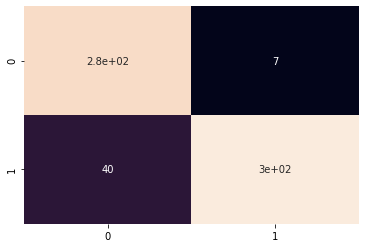

In [252]:
#Aplicando o método under sampling ADASYN na base desbalanceada
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=1)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, pred_xgb)
print(classification_report(y_test, pred_xgb))
print('XGB Matrix: {}\n'.format(cm_xgb))

sns.heatmap(cm_xgb, annot=True, cbar=False);

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       326
           1       0.96      0.88      0.92       290

    accuracy                           0.93       616
   macro avg       0.93      0.92      0.92       616
weighted avg       0.93      0.93      0.93       616

XGB Matrix: [[316  10]
 [ 36 254]]



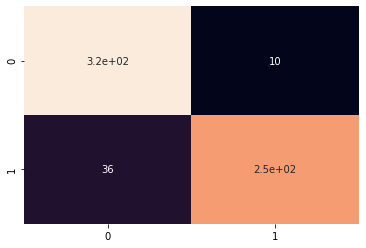

In [253]:
#Aplicando a mistura técnicas de over e under sampling com SMOTETomek
X_resampled, y_resampled = SMOTETomek(ratio='minority',random_state=1).fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=1)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, pred_xgb)
print(classification_report(y_test, pred_xgb))
print('XGB Matrix: {}\n'.format(cm_xgb))

sns.heatmap(cm_xgb, annot=True, cbar=False);

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       179
           1       0.95      0.92      0.93       297

    accuracy                           0.92       476
   macro avg       0.91      0.92      0.91       476
weighted avg       0.92      0.92      0.92       476

XGB Matrix: [[165  14]
 [ 25 272]]



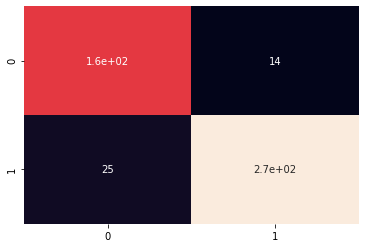

In [276]:
#Aplicando a mistura técnicas de over e under sampling com SMOTEENN
X_resampled, y_resampled = SMOTEENN(random_state=1, ratio='minority').fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
pred_xgb = model.predict(X_test)

cm_xgb = confusion_matrix(y_test, pred_xgb)
print(classification_report(y_test, pred_xgb))
print('XGB Matrix: {}\n'.format(cm_xgb))

sns.heatmap(cm_xgb, annot=True, cbar=False);

Notamos que a mistura da técnica de over e under sampling com SMOTEENN apresentou o melhor resultado na métrica F1-Score, acertando 93% dos dados com a classe 1

In [256]:
#Importando bibliotecas para salvar o modelo treinado
import pickle
import joblib
from xgboost import Booster

In [278]:
#Salvando procedimento de transformação de variáveis categórica e normalização dos dados que serão usado na aplicação em produção 
with open('model.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, model], f)

In [258]:
#Salvando o modelo de previsão que obteve o melhor resultado para ser usado na aplicação em produção
#xgb_ok.save_model('model.dat')

In [279]:
#Carregando procedimentos de normalização e transformação salvos
with open('model.pkl', 'rb') as f:
  scaler, onehotencoder, model = pickle.load(f)

In [282]:
#Carregando procedimentos de normalização e transformação salvos
with open('precessing_data.pkl', 'rb') as f:
  scaler, onehotencoder = pickle.load(f)

In [283]:
#Carregando dados para teste do modelo em produção
df_test = pd.read_csv('/content/drive/MyDrive/Portfólio Machine Learning/Departamento Recursos Humanos/Test model.csv', sep=';')
df_test = df_test.rename(columns={'Age':'Idade', 'Attrition':'Atrito', 'BusinessTravel':'Viagem_Negocio', 'DailyRate':'Valor_Diario', 'Department':'Departamento', 'DistanceFromHome':'Distancia_Casa',
                                              'Education':'Educacao', 'EducationField':'Area_Formacao', 'EmployeeCount':'Cont_Empregado',  'EmployeeNumber':'Matricula_Empreg', 'EnvironmentSatisfaction':'Satisfeito_Ambiente',
                                              'Gender':'Genero', 'HourlyRate':'Horas_Trabalhadas', 'JobInvolvement':'Envolvimento_Trabalho', 'JobLevel':'Nivel_Emprego', 'JobRole':'Cargo', 'JobSatisfaction':'Satisfeito_Trabalho',
                                              'MaritalStatus':'Estado_Civil', 'MonthlyIncome':'Renda_Mensal', 'MonthlyRate':'Taxa_Mensal', 'NumCompaniesWorked':'Num_Empresa_Trabalhou', 'Over18':'Mais_18', 'OverTime':'Hora_Extra',
                                              'PercentSalaryHike':'Aumento_Percentual_Salar', 'PerformanceRating':'Avaliacao_Desempenho', 'RelationshipSatisfaction':'Satisfacao_Relacionamento', 'StandardHours':'Carga_Horaria',
                                              'StockOptionLevel':'Nivel_Acoes_Empresa', 'TotalWorkingYears':'Tempo_De_Registro', 'TrainingTimesLastYear':'Tempo_Treinamento_Ano_Passado', 'WorkLifeBalance':'Equilibrio_Trab_Vida_Pess',
                                              'YearsAtCompany':'Tempo_Na_Empresa', 'YearsInCurrentRole':'Anos_Funcao_Atual', 'YearsSinceLastPromotion':'Anos_Desde_Ultim_Promo', 'YearsWithCurrManager':'Anos_Com_Mesmo_Gerente'})

df_test['Hora_Extra'] = df_test['Hora_Extra'].apply(lambda x: 1 if x == 'Yes' else 0)
df_test['Atrito'] = df_test['Atrito'].apply(lambda x: 1 if x == 'Yes' else 0)
data_new = df_test.drop(['Atrito', 'Mais_18', 'Carga_Horaria', 'Cont_Empregado', 'Matricula_Empreg'], axis=1)

In [286]:
#Separando os dados em categórico e número e em seguida removendo a coluna 'Atrito'
X_cat_new = data_new[['Viagem_Negocio', 'Departamento', 'Area_Formacao', 'Genero', 'Cargo', 'Estado_Civil']]
X_num_new = data_new[['Idade', 'Valor_Diario', 'Distancia_Casa', 'Educacao', 'Satisfeito_Ambiente', 'Horas_Trabalhadas', 'Envolvimento_Trabalho', 
                        'Nivel_Emprego', 'Satisfeito_Trabalho', 'Renda_Mensal', 'Taxa_Mensal', 'Num_Empresa_Trabalhou', 'Hora_Extra', 'Aumento_Percentual_Salar',
                        'Avaliacao_Desempenho', 'Satisfacao_Relacionamento', 'Nivel_Acoes_Empresa', 'Tempo_De_Registro', 'Tempo_Treinamento_Ano_Passado',
                        'Equilibrio_Trab_Vida_Pess', 'Tempo_Na_Empresa', 'Anos_Funcao_Atual', 'Anos_Desde_Ultim_Promo', 'Anos_Com_Mesmo_Gerente']]

In [288]:
#Aplicando transformação de dados categórico
X_cat_encod = onehotencoder.transform(X_cat_new).toarray()
X_cat_encod = pd.DataFrame(X_cat_encod)

In [296]:
#Concatenando dados transformado com dados numérico
X_new_all = pd.concat([X_cat_encod, X_num_new], axis= 1)

In [297]:
#Normalizando os dados
data_new = scaler.transform(X_new_all)

In [298]:
#Executando o modelo
pred = model.predict(data_new)

In [299]:
#Aplicando dados ao modelo
pred = pd.DataFrame(pred, columns=['Predict'])
df_test['Predict'] = pred

In [300]:
#Resultado das previsões
df_test[['Atrito', 'Predict']]

,Atrito,Predict
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [301]:
#Metrica do modelo em produção
print(classification_report(df_test['Atrito'],pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.67      1.00      0.80         6

    accuracy                           0.93        42
   macro avg       0.83      0.96      0.88        42
weighted avg       0.95      0.93      0.93        42

